# Cap. 6 - NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Álgebra linear



### Sistema de equações lineares

O numpy oferece a função `np.linalg.solve` para resolver sistemas de equações lineares do tipo:

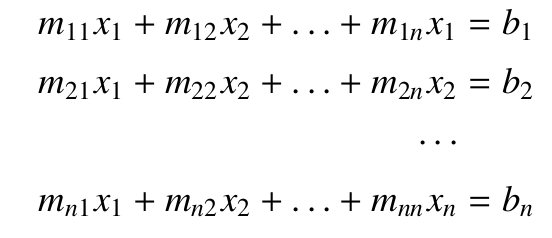

Os quais podem também serem expressos como uma equação matricial

$$M x = b$$

com

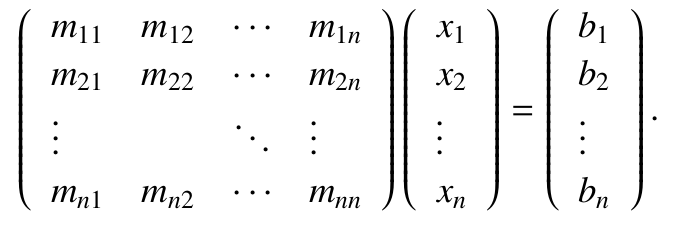

Por exemplo, o sistema

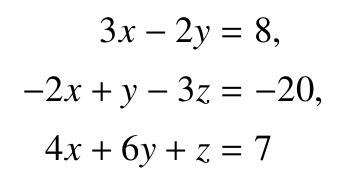

pode ser escrito como

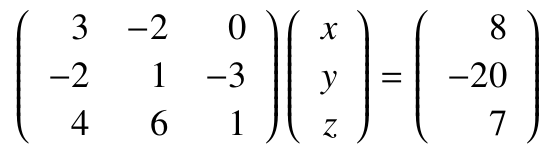

Para resolvê-lo podemos fazer

$$M x = b$$

com

In [ ]:
M = np.array([[ 3, -2,  0],
              [-2,  1, -3],
              [ 4,  6,  1]])

b = np.array([8 , -20, 7])

In [ ]:
#retorna um array com o valores de x,y,z
np.linalg.solve(M,b)

array([ 2., -1.,  5.])

Caso não exista solução única, a função `np.linalg.solve` retorna erro:

In [ ]:
M = np.array([[ 3, -2,  3],
              [-2,  1, -2],
              [ 4,  6,  4]])

b = np.array([8 , -20, 7])

np.linalg.solve(M,b)

LinAlgError: Singular matrix

In [ ]:
#só temos duas equações colunas linearmente independentes
np.linalg.matrix_rank(M)

2

In [ ]:
#M tem determinante zero e portanto não tem inversa
np.linalg.det(M)

0.0

### Solução de míninos quadrados

Quando a equação

$$
M x = b
$$

não possui solução única, podemos ainda procurar para chamada solução de mínimos quadrados (*linear least-squares solution*), que minimiza a chamada norma $L^2$:

$$
||b-M x||^2
$$

Essa solução pode ser obtida usando a função `np.linalg.lstsq`, a qual retorna uma tupla com:

- valores de $x$;
- soma no residuos;
- rank da matriz $M$;
- valores singulares de $M$ (raíz quadrada do autovalores positivos de $M^TM$ ou $M M^T$).



Um exemplo comum de uso desse tipo de solução é o ajuste de modelos lineares

$$
y = m x + c
$$
a conjunto de dados.

*Exemplo E6.17:* [Lei de Beer-Lambert](https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law) (mais uma vez):

$$
I_t = I_0 e^{-\alpha c l}
$$
com:

- $I_t$ intensidade da luz transmitida através de uma solução;
- $I_0$ intensidade da luz incidente;
- $c$ concentração da substância na solução;
- $l$ comprimento do caminho da luz;
- $\alpha$ coeficiente de absorção para o comprimento de onda $\lambda$ da luz.

Inicialmente, notamos que essa relação pode ser linearizada:

$$
y = \ln I_t/ I_0 = -\alpha c l
$$

Porém, vamos considerar que possa existir um intercepto não nulo

$$
y = m c + k
$$

com $m=-\alpha l$ e $k\approx 0$.

Supondo $l=0.8 cm$ e os seguintes dados:

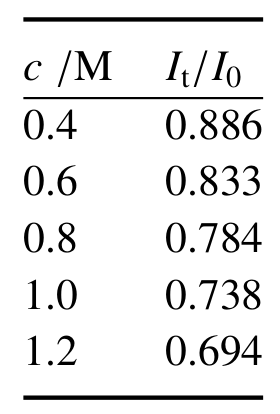

Podemos formular o problema como:

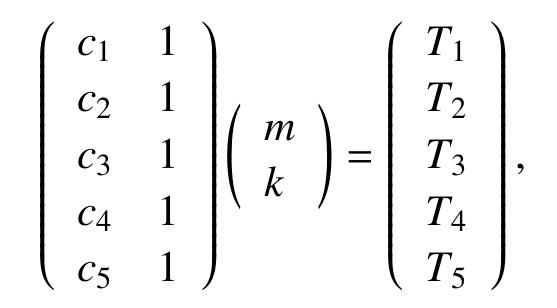

com $T=y=\ln I_t/I_0$.

In [ ]:
l = 0.8

c = np.array([0.4, 0.6, 0.8, 1.0, 1.2])
It_over_I0  = np.array([0.886, 0.833, 0.784, 0.738, 0.694])

In [ ]:
A = np.vstack((c, np.ones(len(c)))).T
A

array([[0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ],
       [1.2, 1. ]])

In [ ]:
T = np.log(It_over_I0)
T

array([-0.12103833, -0.18272164, -0.24334626, -0.30381145, -0.36528332])

In [ ]:
(m,k), resid, _, _ = np.linalg.lstsq(A, T,rcond=None)

In [ ]:
m,k

(-0.3047898988814616, 0.0005917197689537782)

In [ ]:
alpha = -m/l
alpha # M-1 cm^-1

0.38098737360182694

In [ ]:
k

0.0005917197689537782

In [ ]:
np.sqrt(resid)

array([0.00067217])

Text(0, 0.5, '$\\ln(I_\\mathrm{t}/I_0)$')

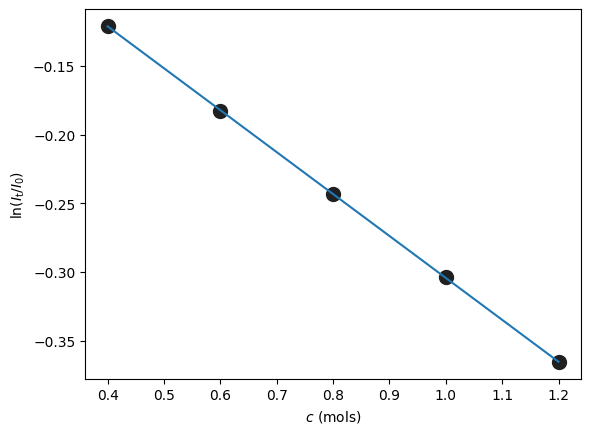

In [ ]:
plt.plot(c,T,'o',ms=10,color='#202020')
plt.plot(c,m*c+k,'-')
plt.xlabel('$c$ (mols)')
plt.ylabel('$\ln(I_\mathrm{t}/I_0)$')

## Números aleatórios

O submódulo `np.random` fornece funções para gerar números aleatórios seguindo várias distribuições, bem como funções para escolher elementos aleatoriamente de listas e embaralhar listas. Esse submódulo estende as capacidades do módulo nativo `random`. Porém, nos dois casos, estamos gerando números pseudo-aleatório que são determinados por uma *seed*.

Para fixar essa variável usamos `np.random.seed`:

In [ ]:
np.random.seed(42)
np.random.randint(1, 10, 10)

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4])

In [ ]:
np.random.randint(1, 10, 10)

array([8, 8, 3, 6, 5, 2, 8, 6, 2, 5])

In [ ]:
np.random.seed(42) #reinicia o gerador
np.random.randint(1, 10, 10) #produzindo a mesma sequência

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4])

### Números aleatórios uniformemente distribuídos

- `np.random.random_sample` gera números aleatórios no intervalo $[0,1)$

In [ ]:
np.random.random_sample()

0.7219987722668247

In [ ]:
np.random.random_sample(size=10)

array([9.38552709e-01, 7.78765841e-04, 9.92211559e-01, 6.17481510e-01,
       6.11653160e-01, 7.06630522e-03, 2.30624250e-02, 5.24774660e-01,
       3.99860972e-01, 4.66656632e-02])

In [ ]:
np.random.random_sample(size=(3,3))

array([[0.97375552, 0.23277134, 0.09060643],
       [0.61838601, 0.38246199, 0.98323089],
       [0.46676289, 0.85994041, 0.68030754]])

Para gerar números no intervalo $[a,b)$ podemos fazer

$$
y = a+(b-a) \text{unif}(0,1)
$$

In [ ]:
a, b = 10, 20
a + (b - a)*np.random.random_sample(size=(3 , 2))

array([[14.50499252, 10.13264961],
       [19.42201756, 15.63288218],
       [13.85416503, 10.15966252]])

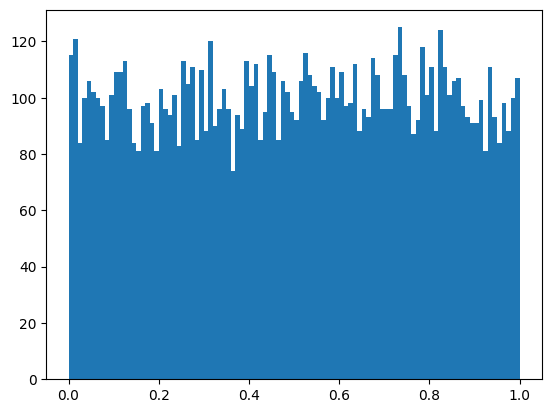

In [ ]:
plt.hist(np.random.random_sample(10000), bins=100);

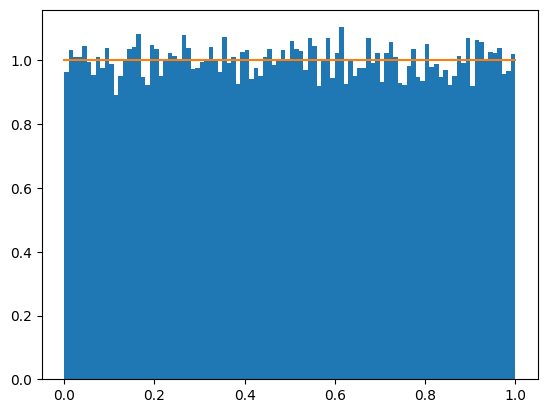

In [ ]:
plt.hist(np.random.random_sample(49000), bins=100, density=True);
x=np.linspace(0,1)
plt.plot(x,[1/1]*len(x))

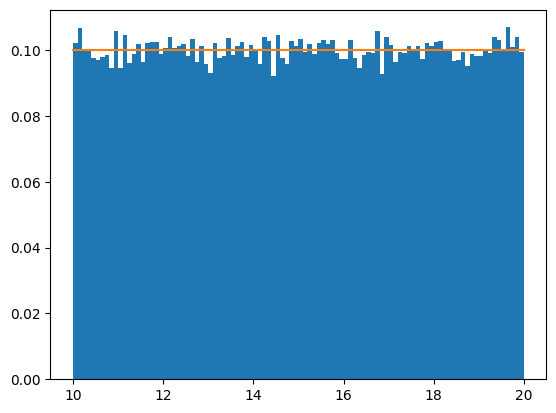

In [ ]:
plt.hist(a+(b-a)*np.random.random_sample(100000), bins=100,density=True);
x=np.linspace(10,20)
plt.plot(x,[1/10]*len(x))

- `np.random.randint(a,b)` gera números aleatórios inteiros no intervalo $[a,b)$. Note que apenas o início do intervalo é fechado. Comportamento difere do `random.randint(a,b)` para o qual as duas pontas do intervalo são fechadas $[a,b]$

In [ ]:
?np.random.randint

In [ ]:
np.random.randint(4) # [0,4)

0

In [ ]:
np.random.randint(4, size=10) # [0,4)

array([0, 0, 3, 3, 3, 1, 0, 1, 1, 3])

In [ ]:
np.random.randint(4, size=(3,5)) # [0,4)

array([[2, 0, 3, 3, 2],
       [2, 3, 1, 1, 1],
       [3, 3, 2, 1, 1]])

In [ ]:
np.random.randint(1,4, size=(3,5)) # [1,4)

array([[3, 3, 3, 2, 3],
       [1, 1, 2, 2, 3],
       [3, 1, 1, 2, 2]])

Podemo usar o `randint` para selecionar elementos aleatoriamente de uma lista:

In [ ]:
a = np.array([6, 6, 6, 7, 7, 7, 7, 7, 7])

In [ ]:
rsel_index = np.random.randint(len(a), size=5)
rsel_index

array([0, 8, 7, 3, 2])

In [ ]:
a[rsel_index]

array([6, 7, 7, 7, 6])

A função `np.random.random_integers(a,b)` é similar a `np.random.randint(a,b)`, porém trabalha com o intervalo fechado $[a,b]$:

In [ ]:
np.random.random_integers(0,2,size=10)

<ipython-input-52-545e13b644a4>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  np.random.random_integers(0,2,size=10)


array([1, 0, 0, 1, 1, 2, 0, 0, 0, 1])

Note que essa função está descontinuada, o que significa que ela será removida no numpy em versões futuras.

*Exemplo E6.18* Números aleatórios reais uniformemente espaçados. Para isso, podemos fazer

```
a + (b-a) * (np.random.randint(n+1) - 1)/(n-1)
```
com `n` sendo quantidade de números no intervalo `[a,b]`

Por exemplo, para gerar no intervalo [1/2,7/2] com quatro divisões:

$$
[1/2, 3/2,5/2,7/2]
$$

podemos fazer:





In [ ]:
a, b, n = 0.5, 3.5, 4

In [ ]:
np.linspace(a,b,n)

array([0.5, 1.5, 2.5, 3.5])

In [ ]:
a + (b-a)*(np.random.randint(n+1, size=10)-1)/(n-1)

array([ 0.5,  2.5,  2.5, -0.5,  2.5,  1.5, -0.5,  1.5,  1.5,  1.5])

In [ ]:
#outra maneira
values = np.linspace(a,b,n)
np.random.choice(values,size=10)

array([1.5, 2.5, 0.5, 0.5, 3.5, 1.5, 2.5, 3.5, 2.5, 0.5])

*Exemplo E6.19* Lançamento de moedas.

In [ ]:
res = ['o', 'x']

In [ ]:
[res[i] for i in np.random.randint(2, size=10)]

['o', 'o', 'o', 'o', 'o', 'x', 'o', 'x', 'x', 'x']

In [ ]:
lancamentos = ''.join([res[i] for i in np.random.randint(2, size=100)])
lancamentos

'ooxxxxoxxooxoxoxoxxooxooxooxoxooxoxxoxxoxoxxxooxooooxoooxxxxxooxooxxxooooooooxoxooooooooooxxooooxxoo'

In [ ]:
from itertools import groupby

In [ ]:
[(ch, len(list(it))) for ch,it in groupby(lancamentos)]

[('o', 2),
 ('x', 4),
 ('o', 1),
 ('x', 2),
 ('o', 2),
 ('x', 1),
 ('o', 1),
 ('x', 1),
 ('o', 1),
 ('x', 1),
 ('o', 1),
 ('x', 2),
 ('o', 2),
 ('x', 1),
 ('o', 2),
 ('x', 1),
 ('o', 2),
 ('x', 1),
 ('o', 1),
 ('x', 1),
 ('o', 2),
 ('x', 1),
 ('o', 1),
 ('x', 2),
 ('o', 1),
 ('x', 2),
 ('o', 1),
 ('x', 1),
 ('o', 1),
 ('x', 3),
 ('o', 2),
 ('x', 1),
 ('o', 4),
 ('x', 1),
 ('o', 3),
 ('x', 5),
 ('o', 2),
 ('x', 1),
 ('o', 2),
 ('x', 3),
 ('o', 8),
 ('x', 1),
 ('o', 1),
 ('x', 1),
 ('o', 10),
 ('x', 2),
 ('o', 4),
 ('x', 2),
 ('o', 2)]

Em lançamentos simulados por pessoas existe uma tendência de se evitar sequências longas de caras ou coroas, que podem ocorrer de maneira aleatória.

### Número aleatórios não uniformes


**Distribuição gaussiana ou normal**

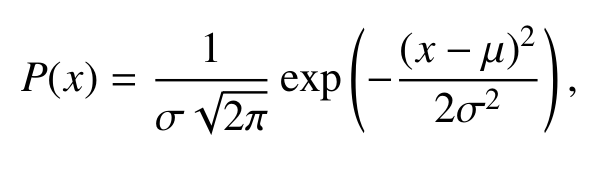

com $\sigma$ sendo desvio padrão e $\mu$ a média.

Essa distribuição está implementada na função `np.random.normal(loc=média, scale=desvio)`

In [ ]:
#loc=0 e scale=1 por padrão
np.random.normal()

-0.8475471977251844

In [ ]:
#desvio padrão 5
np.random.normal(scale=5., size=3)

array([ 6.12981685, -3.08922816,  2.37115295])

In [ ]:
#média 100 e desvio 8
np.random.normal(100., 8., size=(4, 2))

array([[ 96.05619401,  95.1015463 ],
       [ 98.39481611,  89.75081187],
       [100.51415486,  98.7659296 ],
       [106.07679949, 101.72276509]])

Usando a distribuição com média nula e desvio padrão unitário, podemos mudar para média $\mu$ e desvio $\sigma$ usando a transformação:

```
mu + sigma * np.random.normal(0, 1)
```

In [ ]:
mu,sigma=5,2
sample1 = mu+sigma*np.random.normal(size=1000)
sample2 = np.random.normal(loc=mu,scale=sigma,size=1000)

In [ ]:
np.mean(sample1),np.mean(sample2)

(5.02562094478271, 4.942482906476358)

In [ ]:
np.std(sample1),np.std(sample2)

(2.0041893592471482, 1.9879979531655707)

*Exemplo E6.20:* Gráfico da distribuição normal.

In [ ]:
mu, sigma = 100., 8.
samples = np.random.normal(loc=mu, scale=sigma, size=10000)

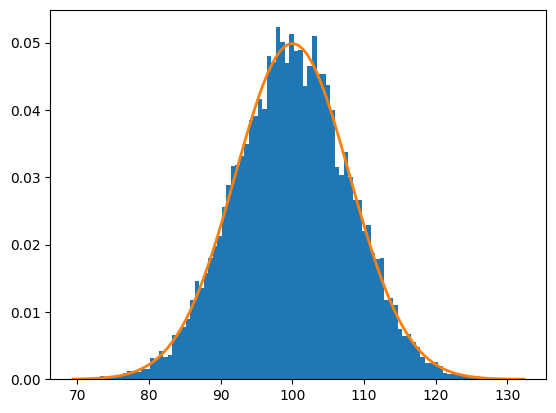

In [ ]:
counts, bins, patches = plt.hist(samples, bins=100, density=True)

x=bins
gauss_teo = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x,gauss_teo,lw=2)

**Distribuição Binomial**

Descreve a probabilidade de encontrar $k$ "sucessos" em $n$ ensaios de Bernoulli, nos quais a probabilidade de sucesso é $p$ e a de falha é $(1-p)$. Essa distribuição é dada por:
$$
p(k) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}
$$
Ela pode representar, por exemplo, a probabilidade de encontrar $k$ coroas em $n$ lançamentos de uma moeda não viciada ($p=1/2$).

A função `np.random.binomial(n, p)` implementa essa distribuição no numpy.


In [ ]:
np.random.binomial(4, 0.5)

1

In [ ]:
np.random.binomial(4, 0.5,size=100)

array([4, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 1, 4, 1,
       2, 3, 1, 3, 2, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 2, 1, 1, 3, 0, 2, 3,
       3, 0, 3, 1, 2, 3, 1, 2, 1, 1, 2, 1, 0, 3, 1, 1, 1, 2, 2, 1, 0, 2,
       0, 2, 4, 3, 3, 1, 3, 1, 3, 3, 1, 2, 1, 2, 4, 2, 3, 3, 4, 1, 3, 3,
       0, 3, 1, 3, 2, 2, 2, 2, 3, 3, 3, 2])

*Exemplo:* Caminhada aleatória:

$$
x_n = \sum_{i=1}^n \xi_i
$$

com $\xi=0$ ou $\xi=1$ com igual probabilidade.

In [ ]:
np.random.choice([0,1])

1

In [ ]:
n=10
xn = [0]
for i in range(0,n):
    xn.append(xn[i]+np.random.choice([0,1]))

xn

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5]

In [ ]:
def xpos(n=10):
    xn = [0]
    for i in range(n):
        xn.append(xn[i]+np.random.choice([0,1]))

    return np.asarray(xn)

In [ ]:
xpos(10)

array([0, 0, 1, 2, 2, 2, 2, 2, 3, 4, 5])

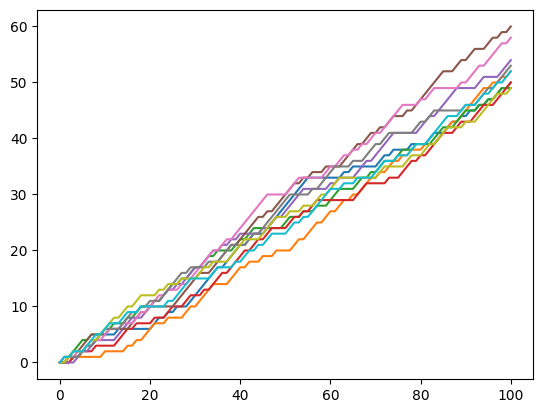

In [ ]:
for _ in range(10):
    plt.plot(xpos(100))

In [ ]:
np.asarray([xpos(n=10)[-1] for _ in range(100)])

array([4, 6, 4, 4, 4, 5, 2, 3, 6, 5, 5, 5, 5, 8, 7, 7, 4, 6, 3, 6, 7, 4,
       6, 6, 2, 6, 5, 7, 8, 6, 7, 4, 4, 4, 6, 3, 6, 7, 5, 7, 4, 4, 4, 6,
       7, 5, 5, 6, 6, 9, 5, 4, 3, 4, 6, 5, 5, 4, 6, 8, 2, 8, 6, 7, 5, 2,
       3, 4, 6, 5, 7, 5, 4, 4, 6, 5, 3, 3, 2, 6, 7, 4, 2, 5, 5, 6, 4, 5,
       5, 6, 4, 5, 5, 3, 7, 4, 9, 8, 5, 6])

In [ ]:
np.asarray([np.random.binomial(10, 0.5) for _ in range(100)])

array([7, 8, 7, 6, 4, 5, 6, 4, 7, 4, 4, 5, 6, 4, 9, 4, 4, 2, 4, 3, 6, 4,
       7, 6, 4, 3, 9, 5, 8, 2, 3, 7, 6, 7, 5, 7, 6, 6, 5, 4, 4, 6, 5, 5,
       6, 7, 5, 5, 5, 4, 6, 2, 5, 6, 5, 7, 5, 5, 3, 5, 6, 2, 5, 8, 8, 3,
       6, 4, 3, 5, 4, 7, 5, 5, 2, 4, 6, 5, 6, 3, 6, 4, 6, 3, 3, 4, 7, 5,
       6, 4, 4, 6, 5, 6, 9, 5, 7, 4, 2, 5])

In [ ]:
rw = np.asarray([xpos(n=10)[-1] for _ in range(10000)])
bi = np.asarray([np.random.binomial(10, 0.5) for _ in range(10000)])

(array([   8.,   86.,  442., 1137., 2061., 2343., 2109., 1245.,  458.,
         111.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

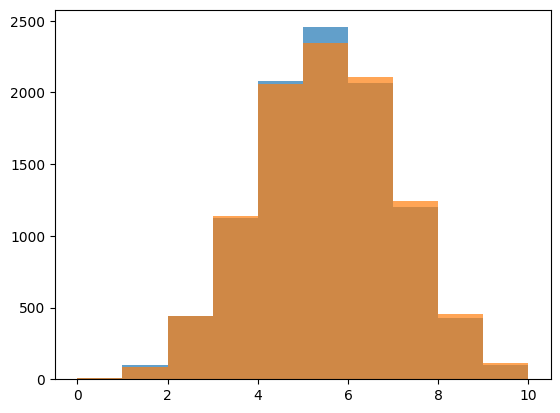

In [ ]:
plt.hist(rw,alpha=0.7)
plt.hist(bi,alpha=0.7)

In [ ]:
from scipy.special import factorial

In [ ]:
def binomial(p=0.5,n=10):
    k = np.arange(0,n+1)
    b = (factorial(n))/(factorial(k)*factorial(n-k))
    return b*(p**k)*(1-p)**(n-k)

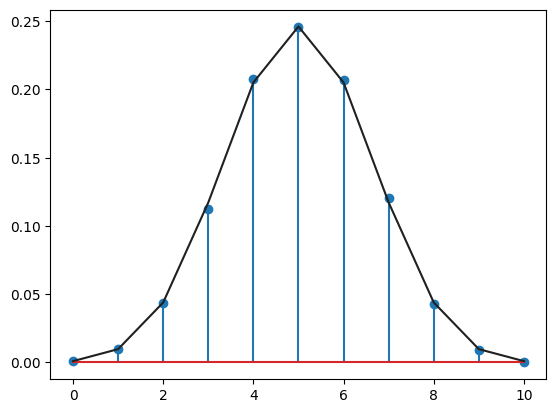

In [ ]:
probs, bins = np.histogram(rw,bins=np.arange(0,10+2),density=True)
plt.stem(bins[:-1],probs)
plt.plot(bins[:-1],binomial(),color='#202020')

**Distribuição de Poisson**

Descreve a probabilidade de ocorrência de um número de eventos independentes $k$ dentro de um intervalo de tempo, supondo que a taxa $\lambda$ de ocorrência é constante. Sua forma é:

$$
p(k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

A função `np.random.poisson(lambda)` implementa essa distribuição.

Por exemplo, supondo alguém que receba em média 2.5 emails por hora, temos que $\lambda=2.5$ e uma amostra do número de emails recebidos por essa pessoa seria:

In [ ]:
#exemplo do número de email em oito intervalos de tempo
np.random.poisson(2.5, size=8)

array([2, 1, 1, 6, 1, 2, 2, 2])

In [ ]:
def poisson(lba=2.5, k=np.arange(0,10)):
    return k,(lba**k)*np.exp(-lba)/factorial(k)

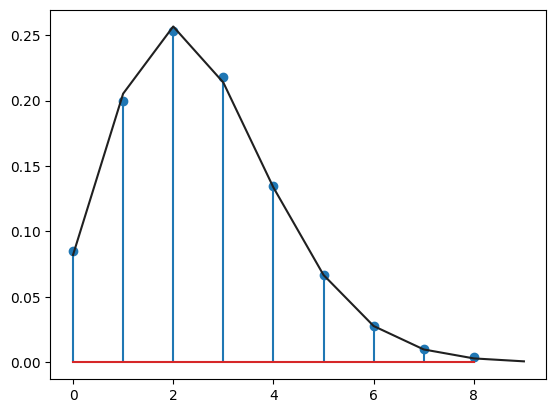

In [ ]:
poisson_sample = np.random.poisson(2.5, 10000)
probs, bins = np.histogram(poisson_sample,bins=np.arange(0,10),density=True)
plt.stem(bins[:-1],probs)
# plt.plot(bins[:-1],binomial(),color='#202020')
plt.plot(*poisson(),color='#202020')

*Exemplo*: Lei dos eventos raros. A binomial pode aproximar-se da Poisson quando $np\to\lambda$.

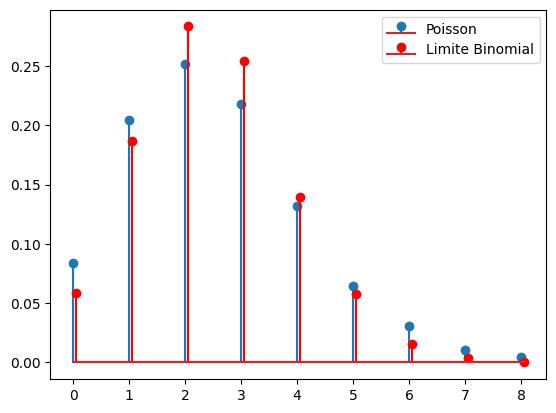

In [ ]:
bin_in_poisson_limit = np.random.binomial(10, 2.5/10,size=10000)
poisson_sample = np.random.poisson(2.5, 10000)

probs, bins = np.histogram(poisson_sample,bins=np.arange(0,10),density=True)
plt.stem(bins[:-1],probs,label='Poisson')

probs, bins = np.histogram(bin_in_poisson_limit,bins=np.arange(0,10),density=True)
plt.stem(bins[:-1]+0.05,probs,'red',label='Limite Binomial')

plt.legend()

In [ ]:
2.5/10000

0.00025

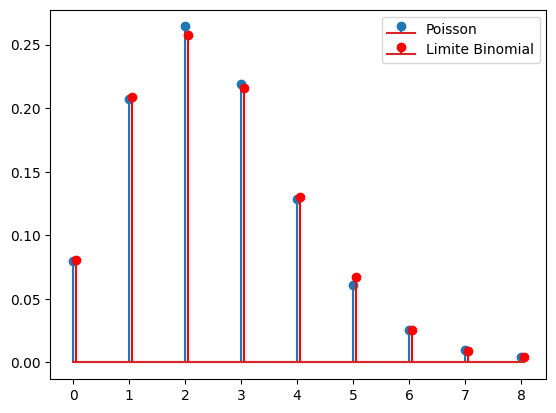

In [ ]:
bin_in_poisson_limit = np.random.binomial(100000, 2.5/100000,size=10000)
poisson_sample = np.random.poisson(2.5, 10000)

probs, bins = np.histogram(poisson_sample,bins=np.arange(0,10),density=True)
plt.stem(bins[:-1],probs,label='Poisson')

probs, bins = np.histogram(bin_in_poisson_limit,bins=np.arange(0,10),density=True)
plt.stem(bins[:-1]+0.05,probs,'red',label='Limite Binomial')

plt.legend()

### Seleções aleatórias, embaralhamentos e permutações

`np.random.choice(array,size)` seleciona elementos de um array de maneira aleatória.

In [ ]:
np.random.choice([1,5,2,-5,5,2,0])

5

In [ ]:
np.random.choice(np.arange(10))

9

Por padrão essa seleção é com substituição:

In [ ]:
a = np.array([1,-1,0])

In [ ]:
np.random.choice(a, 2)

array([0, 0])

In [ ]:
#podemos mudar esse comportamento
np.random.choice(a, 2, replace=False)

array([0, 1])

In [ ]:
np.random.choice(a, 3, replace=False)

array([ 0,  1, -1])

In [ ]:
#não é possível, pois a só tem 3 elementos
np.random.choice(a, 4, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

Podemos especificar as probabilidades:

In [ ]:
a = np.array([1 , 2, 0, -1, 1])

In [ ]:
np.random.choice(a, size=5, p=[0.1, 0.1, 0., 0.7, 0.1])

array([-1,  1, -1,  2,  2])

In [ ]:
np.random.choice(a, size=2, p=[0.1, 0.1, 0., 0.7, 0.1], replace=False)

array([ 1, -1])

- `np.random.shuffle` embaralha um array in place;
- `np.random.permutation` embaralha um array e retorna uma cópia.

In [ ]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [ ]:
#a não muda
np.random.permutation(a)

array([3, 0, 1, 2, 4, 5])

In [ ]:
a

array([0, 1, 2, 3, 4, 5])

In [ ]:
#não retorna nada, mas modifica a
np.random.shuffle(a)

In [ ]:
a

array([3, 2, 4, 1, 5, 0])

Nos dois casos, `permutation` e `shuffle` atuam apenas na primeira dimensão do array:

In [ ]:
a = np.arange(6).reshape(3, 2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
np.random.permutation(a) #permuta as linhas, mas não as colunas

array([[4, 5],
       [0, 1],
       [2, 3]])